# Brain Tumor Classification - Baseline CNN Model

This notebook implements a baseline CNN model for brain tumor classification using PyTorch. We'll use the preprocessed brain tumor MRI dataset to train and evaluate a simple CNN architecture.

## 1. Setup and Imports

In [1]:
# Import modules
import numpy as np
import os
import torch
import time

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Set up device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Use os.path.join to avoid manual path issues
path = os.path.join('gdrive', 'My Drive', 'Erdos', 'brainnet-medical-imaging', 'src')

# Change directory
# os.getcwd()
os.chdir(path)

In [ ]:
# Use this if running locally
# import our own modules
# import sys
# sys.path.append('../src')  # Add the src directory to the Python path
# import our own modules
import sys
sys.path.append('../src')  # Add the src directory to the Python path


# import data
from config.data import data_setup, data_loader
from models.cnn import BrainTumorCNN #CNNModel
from utils.prediction import train_model, predict_single_image, summary
from utils.visualization import plot_training_history, conf_matrix

Using device: cuda
Using device: cuda


## 2. Data Loading and Preprocessing

In [3]:
# Load data and data_loaders
train_set, test_set, label_conversion_dict = data_setup()
train_loader, test_loader = data_loader(train_set, test_set)

# Extract the class labels from the dictionary keys
class_labels = list(label_conversion_dict.keys())[:4]

/home/skl5876/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1
None


100%|██████████| 6597/6597 [00:00<00:00, 11626.80it/s]


Initial number of samples in train set: 5505
Initial number of samples in test set: 1092
Total samples in train set after overriding labels: 5505
Total samples in test set after overriding labels: 1092
Total files in train set: 5505, with target values: [0, 1, 2, 3]
Total files in test set: 1092, with target values: [0, 1, 2, 3]


## 3. Model Architecture

Our baseline model is a simple CNN with four convolutional blocks and two fully connected layers.

*   Convolutional Blocks: Each block (Conv → BatchNorm → LeakyReLU → MaxPool) progressively extracts features and reduces image dimensions
*   Fully Connected Layers & Dropout: The FC layers, with dropout in between, help the model generalize and prevent overfitting
*   Overall: This design is lightweight and fast to train, providing a solid baseline to compare against more complex or pre-trained architectures in the future

In [4]:
# Initialize model
model_cnn = BrainTumorCNN().to(device)
print(model_cnn)

BrainTumorCNN(
  (features): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.01)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_st

## 4. Model Training and Evaluation

Here we initialize our model, loss function, optimizer, and learning rate scheduler. We then train the model using our defined training function.

In [5]:
# Train the model
start_time = time.time()
history = train_model(
    model=model_cnn,
    train_loader=train_loader,
    val_loader=test_loader,
    num_epochs=20
)

Epoch 1/20:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 1/20:
Train Loss: 0.7480, Val Loss: 0.5865, Accuracy: 75.00%
Epoch 1 took 11.65 seconds


Epoch 2/20:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 2/20:
Train Loss: 0.4272, Val Loss: 0.3001, Accuracy: 88.46%
Epoch 2 took 10.62 seconds


Epoch 3/20:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 3/20:
Train Loss: 0.3647, Val Loss: 0.4272, Accuracy: 83.33%
Epoch 3 took 10.61 seconds


Epoch 4/20:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 4/20:
Train Loss: 0.3222, Val Loss: 0.3514, Accuracy: 86.08%
Epoch 4 took 10.63 seconds


Epoch 5/20:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 5/20:
Train Loss: 0.2220, Val Loss: 0.2969, Accuracy: 87.73%
Epoch 5 took 10.66 seconds


Epoch 6/20:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 6/20:
Train Loss: 0.3068, Val Loss: 0.3375, Accuracy: 86.81%
Epoch 6 took 10.65 seconds


Epoch 7/20:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 7/20:
Train Loss: 0.2677, Val Loss: 0.1756, Accuracy: 92.77%
Epoch 7 took 10.60 seconds


Epoch 8/20:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 8/20:
Train Loss: 0.1944, Val Loss: 0.3799, Accuracy: 85.99%
Epoch 8 took 10.61 seconds


Epoch 9/20:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 9/20:
Train Loss: 0.2425, Val Loss: 0.1196, Accuracy: 95.51%
Epoch 9 took 10.62 seconds


Epoch 10/20:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 10/20:
Train Loss: 0.1364, Val Loss: 0.1069, Accuracy: 96.06%
Epoch 10 took 10.64 seconds


Epoch 11/20:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 11/20:
Train Loss: 0.1908, Val Loss: 0.1965, Accuracy: 92.49%
Epoch 11 took 10.60 seconds


Epoch 12/20:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 12/20:
Train Loss: 0.1791, Val Loss: 0.1293, Accuracy: 95.15%
Epoch 12 took 10.70 seconds


Epoch 13/20:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 13/20:
Train Loss: 0.1124, Val Loss: 0.1077, Accuracy: 96.43%
Epoch 13 took 10.63 seconds


Epoch 14/20:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 14/20:
Train Loss: 0.1557, Val Loss: 0.3775, Accuracy: 88.00%
Epoch 14 took 10.58 seconds


Epoch 15/20:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 15/20:
Train Loss: 0.2209, Val Loss: 0.1507, Accuracy: 93.96%
Epoch 15 took 10.63 seconds


Epoch 16/20:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 16/20:
Train Loss: 0.1679, Val Loss: 0.1191, Accuracy: 95.70%
Epoch 16 took 10.70 seconds


Epoch 17/20:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 17/20:
Train Loss: 0.1124, Val Loss: 0.1121, Accuracy: 96.43%
Epoch 17 took 10.71 seconds


Epoch 18/20:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 18/20:
Train Loss: 0.0573, Val Loss: 0.0798, Accuracy: 97.34%
Epoch 18 took 10.58 seconds


Epoch 19/20:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 19/20:
Train Loss: 0.0398, Val Loss: 0.0768, Accuracy: 97.71%
Epoch 19 took 10.56 seconds


Epoch 20/20:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 20/20:
Train Loss: 0.0404, Val Loss: 0.0736, Accuracy: 97.34%
Epoch 20 took 10.61 seconds


In [6]:
# Record the end time
end_time = time.time()

# Calculate training duration
training_duration = end_time - start_time
print(f"Training completed in: {training_duration / 60:.2f} minutes")

Training completed in: 4.94 minutes


## 5. Visualizing Results

We visualize the training and validation metrics to understand how our model performs over time. This includes:
- Training and validation loss curves
- Validation accuracy progression

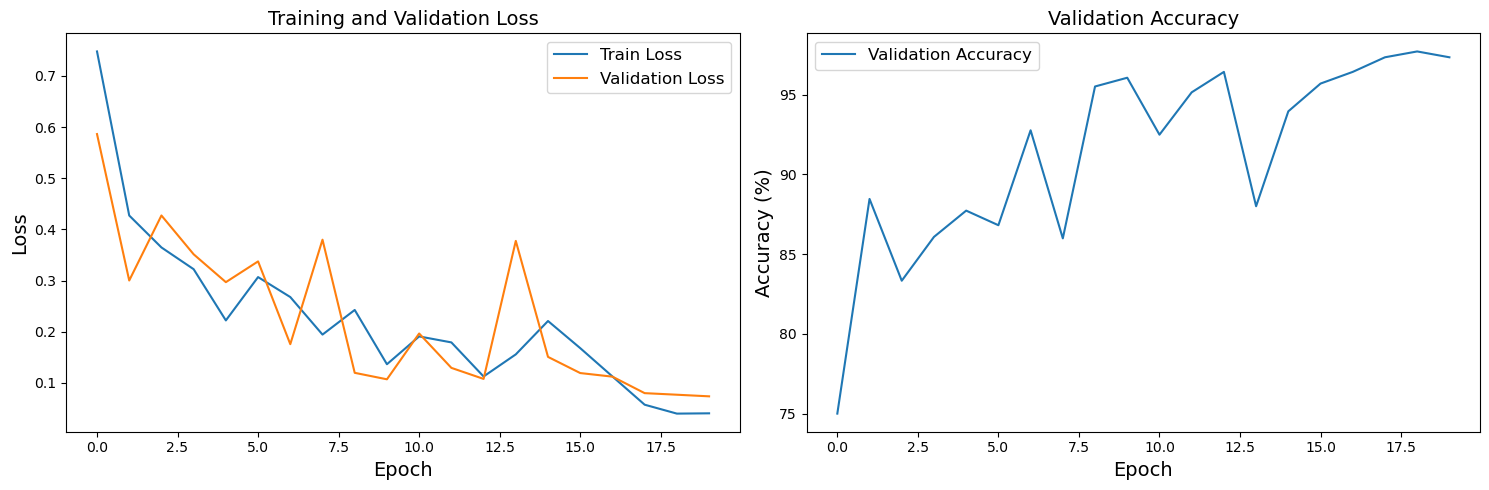

In [7]:
# Plot training history
plot_training_history(history)

We now test our model on an example image from the test set and visualize the results. This helps us understand how the model performs on specific examples.

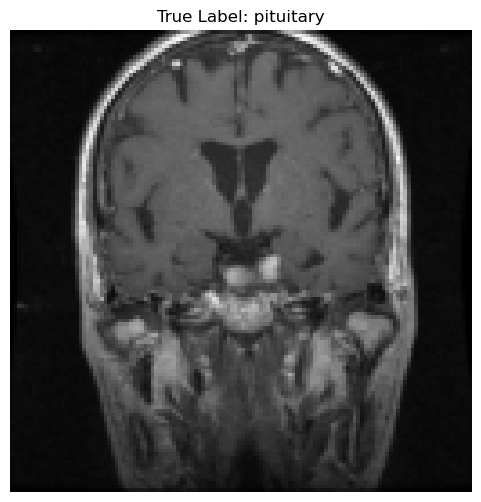

Predicted Class: pituitary
Predicted Class: pituitary


In [8]:
# Example prediction
predicted_class = predict_single_image(model_cnn, test_set, device)
print(f'Predicted Class: {predicted_class}')

We can now plot the confusion matrix of our predictions to understand if our model performs well/poorly for certain classes.

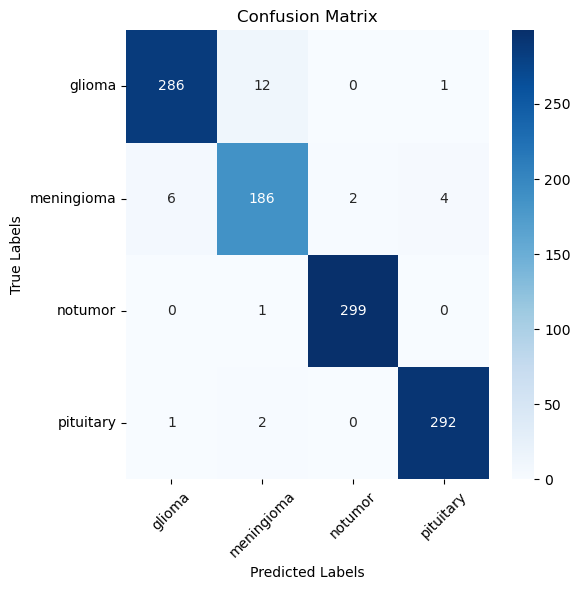

In [9]:
confusion_matrix = conf_matrix(model_cnn, test_set, label_conversion_dict)

In [10]:
summary(confusion_matrix, class_labels)

Summary: 

We have 

97.61% accuracy rate for predicting glioma.
If glioma is predicted, the true class of the predicted image could be:
meningioma with 2.05% chance
notumor with 0.00% chance
pituitary with 0.34% chance


92.54% accuracy rate for predicting meningioma.
If meningioma is predicted, the true class of the predicted image could be:
glioma with 5.97% chance
notumor with 0.50% chance
pituitary with 1.00% chance


99.34% accuracy rate for predicting notumor.
If notumor is predicted, the true class of the predicted image could be:
glioma with 0.00% chance
meningioma with 0.66% chance
pituitary with 0.00% chance


98.32% accuracy rate for predicting pituitary.
If pituitary is predicted, the true class of the predicted image could be:
glioma with 0.34% chance
meningioma with 1.35% chance
notumor with 0.00% chance


